In [3]:
import os
from matplotlib import pyplot as plt
import numpy as np
from scipy.io import wavfile

In [4]:
datadir = "../CoughSegmentation/Data"
max_coughs = 0
coughs_cnt = {}
for file in os.listdir(datadir):
    if file.endswith(".txt"):
        with open(datadir + "/" + file, "r") as f:
            entries = f.readlines()
            num_coughs = len(entries)
            max_coughs = max(max_coughs, num_coughs)
            coughs_cnt[num_coughs] = coughs_cnt.get(num_coughs, 0) + 1

print(max_coughs)
print(coughs_cnt)

13
{5: 29, 4: 39, 2: 20, 1: 9, 7: 12, 3: 47, 6: 21, 8: 12, 10: 4, 12: 3, 9: 2, 11: 1, 13: 1}


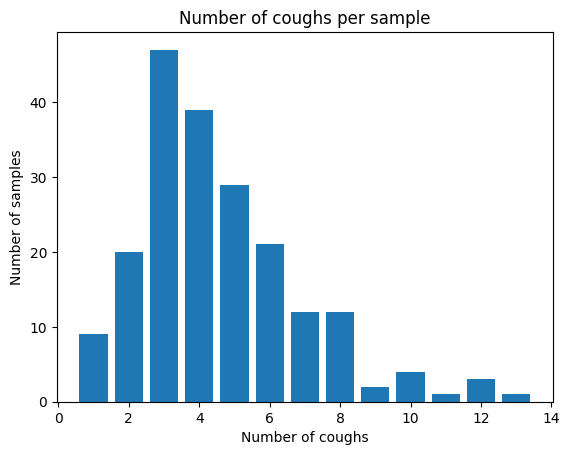

In [5]:
# plot histogram
plt.bar(coughs_cnt.keys(), coughs_cnt.values())
plt.xlabel("Number of coughs")
plt.ylabel("Number of samples")
plt.title("Number of coughs per sample")
plt.show()

rate for recording is 48000

(array([110., 284.,   0.,   0.,   1.,   0.,   0.,   1.,   2.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.]),
 array([  1.32 ,   6.819,  12.318,  17.817,  23.316,  28.815,  34.314,
         39.813,  45.312,  50.811,  56.31 ,  61.809,  67.308,  72.807,
         78.306,  83.805,  89.304,  94.803, 100.302, 105.801, 111.3  ]),
 <BarContainer object of 20 artists>)

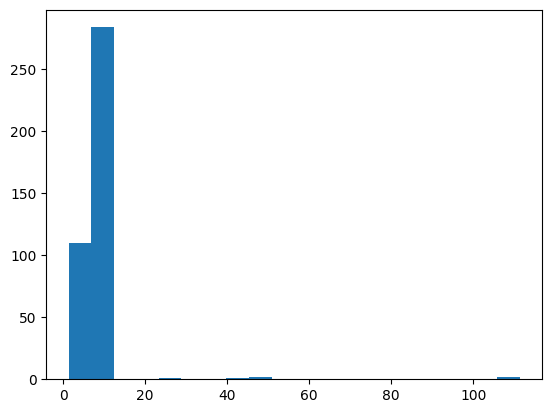

In [6]:
# check wav files to get info about duration, draw bin count
rec_lengths = []
for file in os.listdir(datadir):
    if file.endswith(".wav"):
        rate, data = wavfile.read(datadir + "/" + file)
        rec_lengths.append(data.shape[0] / rate)

plt.hist(rec_lengths, bins=20)

Some recordings are too long, we'll drop any file longer than 11 second

In [7]:
rec_lengths = []
for file in os.listdir(datadir):
    if file.endswith(".wav"):
        rate, data = wavfile.read(datadir + "/" + file)
        if data.shape[0] / rate > 11:
            print(file, data.shape[0] / rate)

29241394-8a28-46f5-8b62-a062b4564c5c.wav 107.88
9f9ce9a8-3c12-4a0c-8636-1149440537b1.wav 27.6
94cefab8-6d46-41c3-908e-59553106ad03.wav 111.3
98d7734d-5522-40da-9f04-b349f9a32916.wav 44.64
acafeba1-00a6-4db2-a8df-ba11b11d4d71.wav 50.04
3efae714-d35d-4833-bcb8-781e13a212c3.wav 50.22


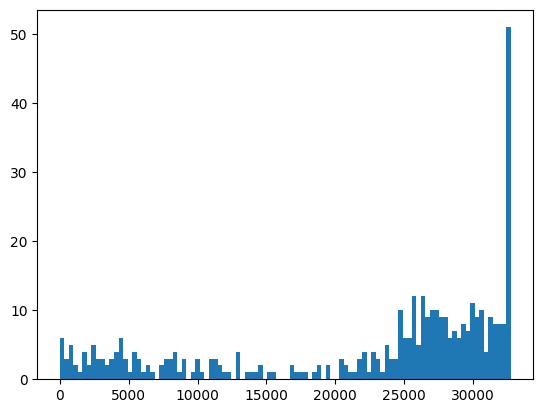

In [8]:
# check amplitude distribution
amplitudes_max = []
amplitudes_min = []
for file in os.listdir(datadir):
    if file.endswith(".wav"):
        rate, data = wavfile.read(datadir + "/" + file)
        amplitudes_max.append(data.max())
        amplitudes_min.append(data.min())

plt.hist(amplitudes_max, bins=100);

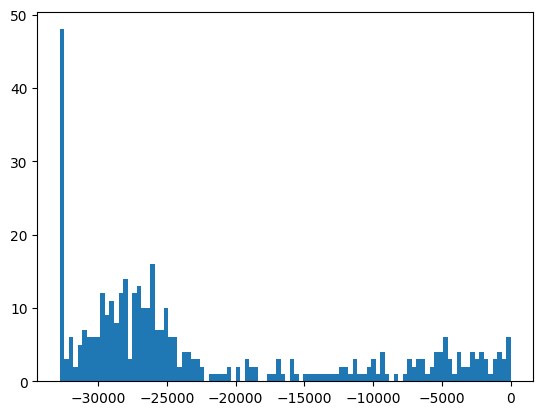

In [9]:
plt.hist(amplitudes_min, bins=100);

All amplitudes are from -35000 to 35000, with a lot of value near both ends (not sure why)

(640, 640)


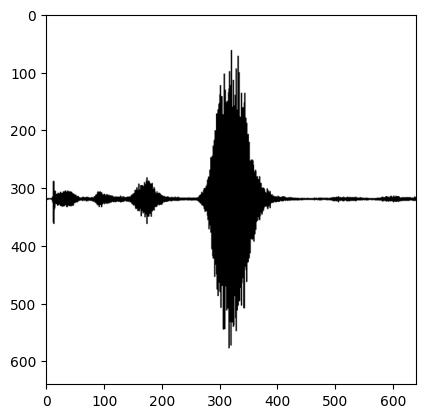

In [12]:
# read image
from PIL import Image
import numpy as np

img = Image.open("../data/images/train/1.png")
print(img.size)
img = img.convert("L")
img = np.array(img)
plt.imshow(img, cmap="gray")